<h1 style='font-size:40px'> Dimensionality Reduction</h1>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A Redução de Dimensionalidade, como seu nome sugere, consiste em reduzir o número de dimensões do nosso dataset. No caso, estaríamos excluindo ou condensando features.
        </li>
        <li> 
            No caso do dataset MNIST, por exemplo, os pixels localizados nas bordas das imagens poderiam ser facilmente removidos, já que são todos brancos para a maioria das instâncias. Seria interessante também condensarmos pixels vizinhos em um único só extraindo a média de suas intensidades.
        </li>
    </ul>
</div>

<h2 style='font-size:30px;'> Mas por que reduzir as dimensões?</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            A necessidade de se diminuir as proporções de nossos dados surge da lentidão em treino proporcionada por datasets volumosos. Para a maior parte das empresas, a rapidez dos modelos (juntamente, é claro, com sua qualidade) é algo altamente demandado. 
        </li>
        <li> 
            Outra vantagem de se fazer essa tarefa é tornar possível a criação de gráficos sobre os dados. Conseguir ter um dataset de 2 a 5 dimensões torna possível a criação de scatter plots (eixo x, y, z, tamanho do scatter, colorbar).
        </li>
        <li> 
            Nota: Para grande parte dos casos, reduzir a dimensionalidade dos dados implica um tradeoff entre rapidez de treinamento e qualidade dos algoritmos.
        </li>
    </ul>
</div>

<h2 style='font-size:30px;'> The Curse of Dimesionality</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O autor expõe nesta seção o fato de que aumentar o número de dimensões do dataset torna mais provável o risco de overfitting. Isso porque, em um espaço multidimensional, a distância média entre dois pontos aleatoriamente escolhidos tende a ser assustadoramente grande.  
        </li>
        <li> 
            Com os dados esparsos, encontrar semelhanças entre eles se torna uma tarefa muito mais difícil. Para fazer uma previsão, os modelos terão poucas instâncias em suas mãos para realizarem as devidas comparações. 
        </li>
    </ul>
</div>

<h2 style='font-size:30px;'> Main Approaches for Dimensionality Reduction</h2>
<h3 style='font-size:30px;font-style:italic'> Projection</h3>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            A Projeção consiste em encontrar um sub-espaço de menores dimensões dentro de um espaço multidimensional no qual projetamos as instâncias de treino.
        </li>
    </ul>
</div>
<center> 
    <h1> Projeção em um espaço 3D</h1>
</center>
<div>
    <img src='projection1.png' width='350px'> 
    <span style='font-size:30px'> &rarr;</span>
    <img src='projection2.png' width='300px'>
</div>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Projeções nem sempre são interessantes. No caso de datasets como o da roleta suíça, as instâncias podem acabar se empilhando, tornando a previsão muito mais difícil.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Manifold Learning</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O Manifold Learing tem como suposição básica a de que o dataset com o qual estamos lidando surgiu da torção de um sub-espaço de dimensões muito menores - o Manifold. Tendo isso em vista, as técnicas de Manifold Learning buscam encontrar esse espaço. 
        </li>
    </ul>
</div>
<center> 
    <img src='manifold1.png'>
</center>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Observe podemos entender a roleta suíça como uma dobra em três dimensões de um manifold 2-D.
        </li>
    </ul>
</div>

<h2 style='font-size:30px;'> PCA</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            PCA é um dos algoritmos de redução de dimensionalidade mais populares atualmente. Ele tenta achar o hiperplano que se encontra mais próximo das instâncias de treino (menor distância ao quadrado média).
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Preserving the Variance</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O algoritmo PCA escolhe como eixos aqueles que preservam a maior variância possível dos dados. Dessa maneira, o mínimo possível de informações é perdido.
        </li>
    </ul>
</div>
<center> 
    <img src='pca1.png'>
</center>

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Na imagem, o eixo a ser escolhido seria o da linha contínua, pois preserva a maior variância entre as opções. Se quiséssemos dar uma segunda dimensão ao sub-espaço, escolheríamos a linha pontilhada, pois ela é ortogonal ao primeiro eixo e preserva grande parte da variância restante. Cada um dos eixos selecionados pelo PCA são denominados como Principal Components.
        </li>
        <li> 
           Se quiséssemos reduzir a dimensionalidade do dataset para duas dimensões, escolheríamos os dois primeiros Principal Components do PCA.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Principal Components</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O autor aqui adverte que o PCA é bastante sensível a modificações no set de treino. Por isso, é necessário ter bastante cuidado ao se tratar as informações.
        </li>
    </ul>
</div>

In [27]:
# Aplicando PCA manualmente pelo Python.
from sklearn.datasets import make_regression
import numpy as np
# Vamos reduzir a dimensão do dataset para 2.
X,y = make_regression(n_features=3, noise=50, bias=2)

# Antes de qualquer coisa, temos que centralizar os dados.
X_centered = X - X.mean(axis=0)

# Extraindo os Principal Components de 'X'.
U, s, Vt = np.linalg.svd(X_centered)
W2 = Vt.T[:, :2]

# Reduzindo a dimensionalidade do dataset.
X2D = X_centered.dot(W2)

In [31]:
# Veja: não necessariamente o PCA vai aumentar a performance do modelo!
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
mean_squared_error(y,LinearRegression().fit(X, y).predict(X)), mean_squared_error(y,LinearRegression().fit(X2D, y).predict(X2D))

(2388.6212670387617, 2458.570542740498)

<h3 style='font-size:30px;font-style:italic'> Using Scikit-Learn</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O Scikit-learn, no módulo decomposition, possui a classe PCA. Essa é capaz de fazer as mesmas transformações realizadas nas últimas células.
        </li>
    </ul>
</div>

In [37]:
# Reduzindo a dimensionalidade de 'X' para 2.
from sklearn.decomposition import PCA

# Os dados são automaticamente centralizados pelo objeto (mas não normalizados!)
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [36]:
# Acessando os Princpal Components com o atributo 'components_'.

# Primeiro Principal Component.
pca.components_[0].T

array([-0.12050085,  0.62671072,  0.7698787 ])

<h3 style='font-size:30px;font-style:italic'> Explained Variance Ratio</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Outro atributo de extrema relevância é o 'explained_variance_ratio_'. Ele nos revela a proporção da variância do dataset que se encontra sobre o eixo de cada Principal Component.
        </li>
    </ul>
</div>

In [38]:
# O primeiro PC leva 37.6% da variância, enquanto o outro 33.3%.
pca.explained_variance_ratio_

array([0.37644482, 0.33293361])

<h3 style='font-size:30px;font-style:italic'> Choosing the Right Number of Dimensions</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            O melhor número de dimensões para o nosso dataset é aquele que preserva a maior parte da sua variância. Para isso, existem duas estratégias para obtermos esse valor, cada uma com a sua vantagem.
        </li>
    </ul>
</div>

In [80]:
# Escolhendo um dataset com mais dimensões.
from sklearn.datasets import load_breast_cancer
X,y = make_regression(n_features=50, noise=50, bias=2)

# Há 30 dimensões em X. Qual seria o número de dimensões que preservaria 95% da variância?
X.shape

(100, 50)

In [65]:
# Podemos especificar a 'explained_variance_ratio' desejado em 'n_components_'
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [82]:
# Ou também conseguimos obter o valor exato de dimensões com o código abaixo.
# Sua vantagem é de que podemos usar 'cumsum' para plotar um gráfico com a variância preservada em função do número de dimensões.


# Invocando PCA sem um 'n_components' específico.
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Obtendo o número de dimensões desejado com np.where.
d = np.argmax(cumsum>=0.95)+1

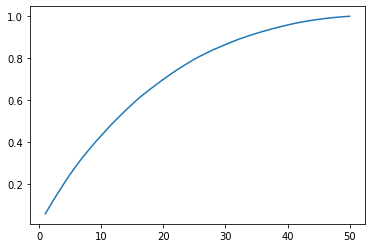

In [87]:
# Montando o gráfico.
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(len(cumsum))], cumsum)

In [86]:
cumsum

array([0.05796646, 0.10872648, 0.1557608 , 0.20222471, 0.24703052,
       0.28764546, 0.32752354, 0.36314469, 0.39810362, 0.43100949,
       0.46356074, 0.4952065 , 0.52440906, 0.55326346, 0.58103072,
       0.60808503, 0.63192519, 0.65506843, 0.67739336, 0.69938125,
       0.72020989, 0.74052511, 0.75910358, 0.77742456, 0.79517274,
       0.81093178, 0.82543563, 0.83977693, 0.85243102, 0.86489189,
       0.87725104, 0.8888001 , 0.89928961, 0.90929897, 0.91860425,
       0.92726472, 0.93574936, 0.94371196, 0.95122297, 0.95825319,
       0.96500821, 0.9709281 , 0.97614064, 0.98115453, 0.98518184,
       0.98908186, 0.99245225, 0.99530368, 0.99785086, 1.        ])

<p style='color:red'>Using Sckit-Learn